# Import necessary libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [4]:
email_opened_table= pd.read_csv("email_opened_table.csv")
email_table = pd.read_csv("email_table.csv")
link_clicked_table = pd.read_csv("link_clicked_table.csv")

In [5]:
email_opened_table.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [6]:
email_table.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [7]:
link_clicked_table.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


# Merging tables based on email id 

In [9]:
df = email_table.copy()

In [10]:
df["email_opened"] = df["email_id"].isin(email_opened_table["email_id"]).astype(int)

In [11]:
df["link_clicked"] = df["email_id"].isin(link_clicked_table["email_id"]).astype(int)

In [12]:
df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_clicked
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0


# Basic checks

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   email_id             100000 non-null  int64 
 1   email_text           100000 non-null  object
 2   email_version        100000 non-null  object
 3   hour                 100000 non-null  int64 
 4   weekday              100000 non-null  object
 5   user_country         100000 non-null  object
 6   user_past_purchases  100000 non-null  int64 
 7   email_opened         100000 non-null  int32 
 8   link_clicked         100000 non-null  int32 
dtypes: int32(2), int64(3), object(4)
memory usage: 6.1+ MB


In [15]:
df.describe()

,email_id,hour,user_past_purchases,email_opened,link_clicked
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,498690.196160,9.059300,3.87845,0.103450,0.021190
std,289230.727534,4.439637,3.19611,0.304547,0.144018
min,8.000000,1.000000,0.00000,0.000000,0.000000
25%,246708.250000,6.000000,1.00000,0.000000,0.000000
50%,498447.000000,9.000000,3.00000,0.000000,0.000000
75%,749942.750000,12.000000,6.00000,0.000000,0.000000
max,999998.000000,24.000000,22.00000,1.000000,1.000000


In [16]:
df.isnull().sum()

email_id               0
email_text             0
email_version          0
hour                   0
weekday                0
user_country           0
user_past_purchases    0
email_opened           0
link_clicked           0
dtype: int64

# EDA (Exploratory data analysis)

## Percentage of emails opened and not opened

In [19]:
email_opened_count=df["email_opened"].value_counts(normalize=True)*100
email_opened_count

email_opened
0    89.655
1    10.345
Name: proportion, dtype: float64

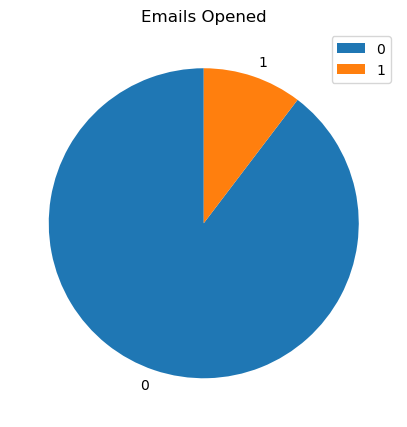

In [20]:
plt.figure(figsize=(5,7))
plt.pie(email_opened_count,labels=email_opened_count.index,startangle=90)
plt.title("Emails Opened")
plt.legend()
plt.show()

### By this we can say there are only 10% Users who opened the emails

## Percentage of link click and not click

In [23]:
link_clicked_count=df["link_clicked"].value_counts(normalize=True)*100
link_clicked_count

link_clicked
0    97.881
1     2.119
Name: proportion, dtype: float64

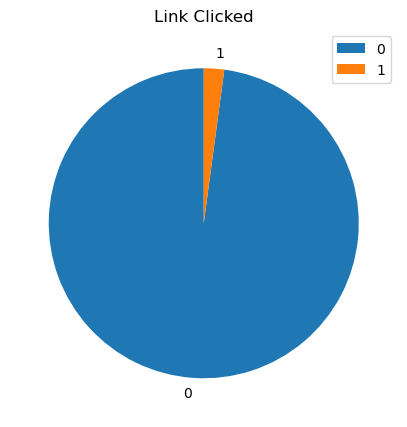

In [24]:
plt.figure(figsize=(5,7))
plt.pie(link_clicked_count, labels = link_clicked_count.index,startangle=90)
plt.title("Link Clicked")
plt.legend()
plt.show()

### There are only 2% of users click the link

## Emails opened based on hours

In [27]:
df_hour = df.groupby("hour")[["email_opened","link_clicked"]].mean().reset_index()

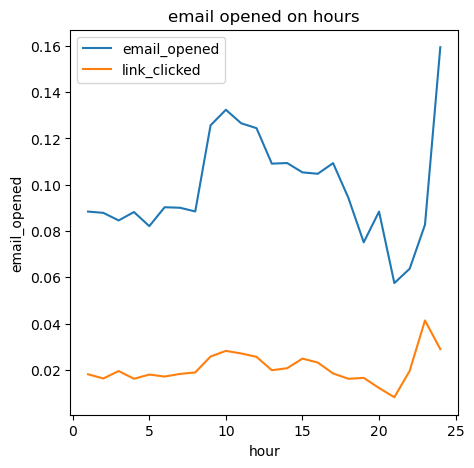

In [28]:
plt.figure(figsize=(5,5))
sns.lineplot(data= df_hour,x= "hour",y="email_opened",label = "email_opened")
sns.lineplot(data= df_hour, x= "hour",y= "link_clicked",label = "link_clicked")
plt.title("email opened on hours")
plt.show()

### There is a good growth of link clicked and email opened rate in the range of 20 to 25 hours

## Rate of Email opened and linked clicked based on weekdays

In [31]:
df_weekday = df.groupby("weekday")[["email_opened","link_clicked"]].mean()

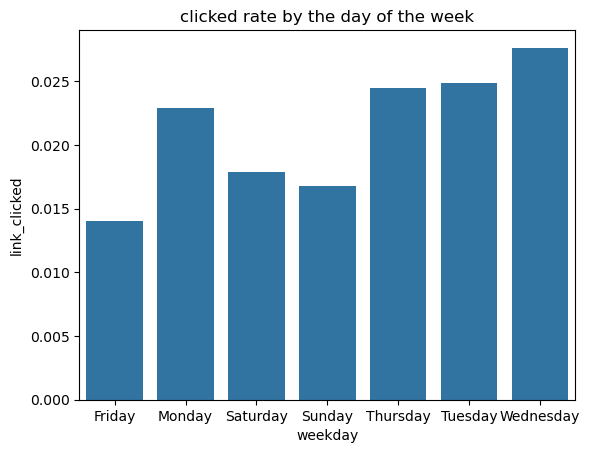

In [32]:
sns.barplot(data=df_weekday, x='weekday', y='link_clicked')
plt.title("clicked rate by the day of the week")
plt.show()

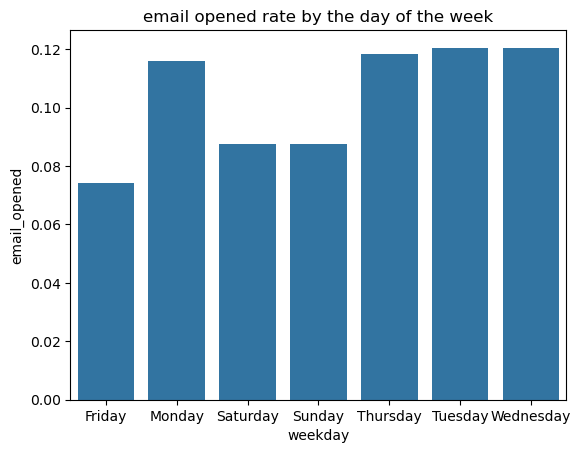

In [33]:
sns.barplot(data=df_weekday, x='weekday', y='email_opened')
plt.title("email opened rate by the day of the week")
plt.show()

### There is a good chance of getting emails opened and linked clicked in weekdays of Monday,Tuesday,Thursday and Wednesday.But Friday It has low Email opened rate and linked clicked rate with Sunday that has low link clicked rate So we can ignore Friday and Sunday 

## Grouping email version With email opened and a link clicked and getting the mean of them

In [36]:
df.groupby("email_version")[["email_opened","link_clicked"]].mean()

,email_opened,link_clicked
email_version,,
generic,0.079348,0.015137
personalized,0.127754,0.027294


### Personalised Emails gives good outcomes On both the email opened and linked clicked

## Grouping email text with email opened and link clicked and with the mean of them

In [39]:
df.groupby("email_text")[["email_opened","link_clicked"]].mean()

,email_opened,link_clicked
email_text,,
long_email,0.091177,0.018538
short_email,0.115860,0.023872


### Short emails has a great impact on email opened and linked clicked

## Grouping email id and link clicked based on user country and getting the mean of the each country 

In [42]:
df_country = df.groupby("user_country")[["email_opened","link_clicked"]].mean().sort_values(by = "link_clicked",ascending=False)
df_country

,email_opened,link_clicked
user_country,,
UK,0.120167,0.024675
US,0.119020,0.024360
ES,0.039129,0.008327
FR,0.040620,0.008004


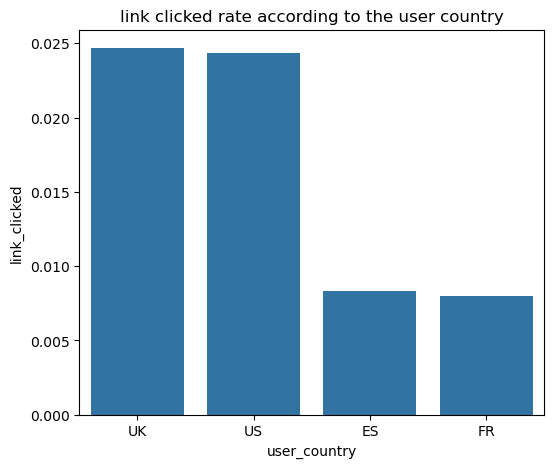

In [43]:
plt.figure(figsize=(6,5))
sns.barplot(data=df_country,x="user_country",y="link_clicked")
plt.title("link clicked rate according to the user country")
plt.show()

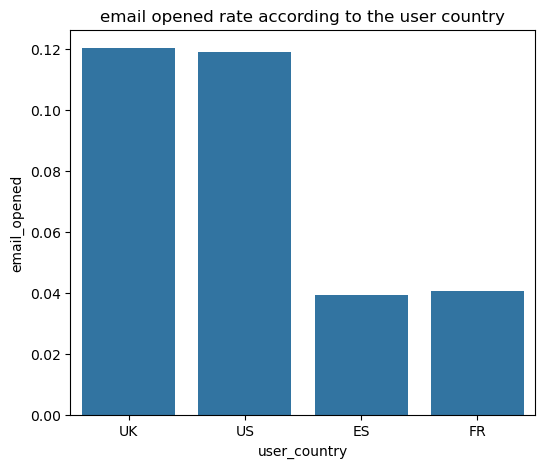

In [44]:
plt.figure(figsize=(6,5))
sns.barplot(data=df_country,x="user_country",y="email_opened")
plt.title("email opened rate according to the user country")
plt.show()

### The UK and US customers has the highest email opened and linked clicked rate 

## Grouping column Based on Past purchases By splitting the past purchase column into bins

In [47]:
df["purchase_bucket"]= pd.cut(df['user_past_purchases'],bins=[-1, 0,1, 5, 10, 50],labels=["0", "1", "2-5", "6-10", "+11"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_13704\1962893010.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("purchase_bucket")[["email_opened","link_clicked"]].mean().plot(kind="bar")


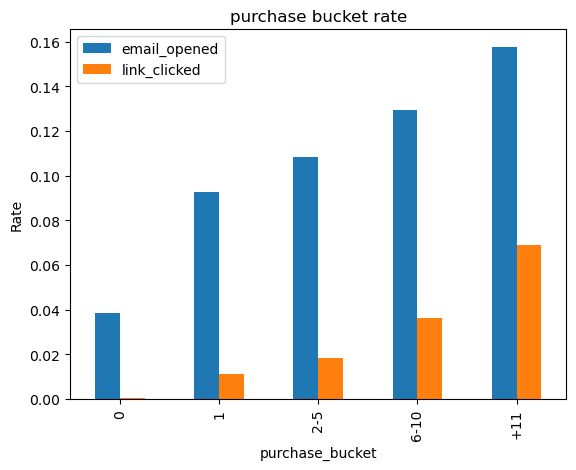

In [48]:
df.groupby("purchase_bucket")[["email_opened","link_clicked"]].mean().plot(kind="bar")
plt.title("purchase bucket rate")
plt.ylabel("Rate")
plt.show()

### The user who have purchased more in the past are more likely to open and click emails

## Representing user percentage according to the country

In [51]:
user_country_count= df["user_country"].value_counts()
user_country_count

user_country
US    60099
UK    19939
FR     9995
ES     9967
Name: count, dtype: int64

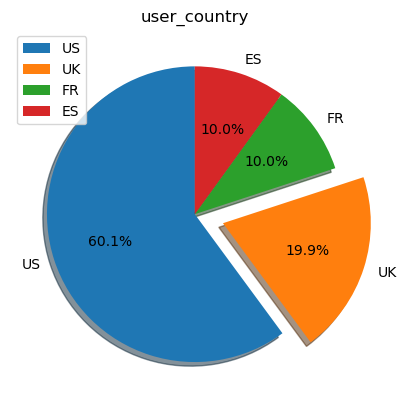

In [52]:
plt.pie(user_country_count,labels = user_country_count.index, startangle = 90,
       explode = (0,0.2,0,0),
       shadow = True, autopct = '%.1f%%')
plt.title("user_country")
plt.legend()
plt.show()

## Checking for the outliers using boxplot

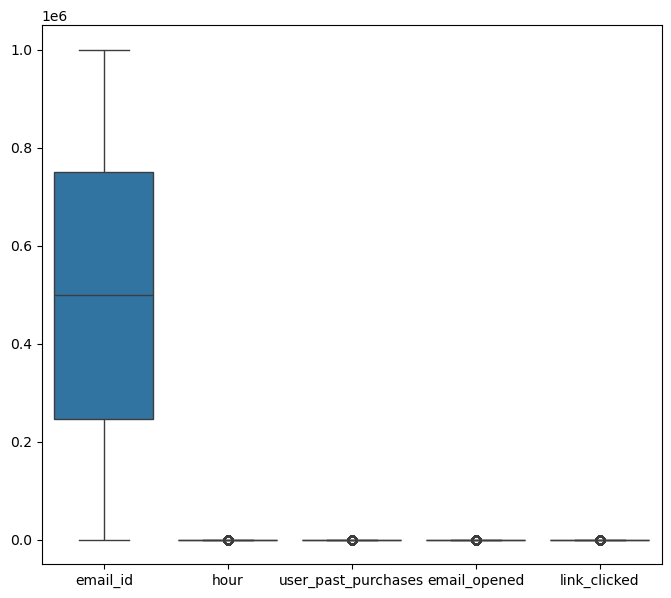

In [54]:
plt.figure(figsize=(8,7))
sns.boxplot(data= df)
plt.show()

# Feature Engneering 

In [56]:
df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_clicked,purchase_bucket
0,85120,short_email,personalized,2,Sunday,US,5,0,0,2-5
1,966622,long_email,personalized,12,Sunday,UK,2,1,1,2-5
2,777221,long_email,personalized,11,Wednesday,US,2,0,0,2-5
3,493711,short_email,generic,6,Monday,UK,1,0,0,1
4,106887,long_email,generic,14,Monday,US,6,0,0,6-10


## Encoding the categorical columns to numerical columns using label encoder

In [58]:
from sklearn.preprocessing import LabelEncoder

cols = ['email_text','email_version','weekday','user_country']

for col in cols:
    df[col]=LabelEncoder().fit_transform(df[col])

## Scaling the user past purchase using a min max scalar technique

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["user_past_purchases_scaled"]=scaler.fit_transform(df[["user_past_purchases"]])

In [61]:
df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_clicked,purchase_bucket,user_past_purchases_scaled
0,85120,1,1,2,3,3,5,0,0,2-5,0.227273
1,966622,0,1,12,3,2,2,1,1,2-5,0.090909
2,777221,0,1,11,6,3,2,0,0,2-5,0.090909
3,493711,1,0,6,1,2,1,0,0,1,0.045455
4,106887,0,0,14,1,3,6,0,0,6-10,0.272727


# Model building

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Defining the features and target column (X,y) And splitting the data into training and testing

In [65]:
X = df.drop(columns=['email_id', 'link_clicked','purchase_bucket']) 
y = df['link_clicked']  

In [66]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Dictionary of classification models with their respective configurations

In [68]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42)
}

### Fitting the training data into each ML model and Getting the Performance of each Machine learning model by Evaluation Methods

In [70]:
metrics = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }

for model_name, model_metrics in metrics.items():
    print(f"{model_name}:")
    for metric_name, value in model_metrics.items():
        print(f"  {metric_name}: {value:.2f}")
    print()

Logistic Regression:
  Accuracy: 0.98
  Precision: 0.73
  Recall: 0.52
  F1-score: 0.53

Random Forest:
  Accuracy: 0.97
  Precision: 0.62
  Recall: 0.58
  F1-score: 0.60

Decision Tree:
  Accuracy: 0.97
  Precision: 0.64
  Recall: 0.61
  F1-score: 0.62

K-Nearest Neighbors:
  Accuracy: 0.98
  Precision: 0.71
  Recall: 0.52
  F1-score: 0.53

Support Vector Machine:
  Accuracy: 0.98
  Precision: 0.49
  Recall: 0.50
  F1-score: 0.49



### verifying whether the machine learning model is overfit or underfit

In [72]:
metrics = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    val_accuracy = accuracy_score(y_val, model.predict(X_val))
    
    if train_accuracy > val_accuracy + 0.1:  
        bias_variance_status = "High Variance (Overfitting)"
    elif train_accuracy < 0.7 and val_accuracy < 0.7: 
        bias_variance_status = "High Bias (Underfitting)"
    else:
        bias_variance_status = "Well-Balanced"

    metrics[model_name] = {
        'Training Accuracy': train_accuracy,
        'Validation Accuracy': val_accuracy,
        'Bias-Variance Status': bias_variance_status
    }


for model_name, model_metrics in metrics.items():
    print(f"{model_name}:")
    for metric_name, value in model_metrics.items():
        print(f"  {metric_name}: {value}")
    print()

Logistic Regression:
  Training Accuracy: 0.9792875
  Validation Accuracy: 0.9778
  Bias-Variance Status: Well-Balanced

Random Forest:
  Training Accuracy: 0.99125
  Validation Accuracy: 0.9712
  Bias-Variance Status: Well-Balanced

Decision Tree:
  Training Accuracy: 0.99125
  Validation Accuracy: 0.9682
  Bias-Variance Status: Well-Balanced

K-Nearest Neighbors:
  Training Accuracy: 0.98055
  Validation Accuracy: 0.976
  Bias-Variance Status: Well-Balanced

Support Vector Machine:
  Training Accuracy: 0.979175
  Validation Accuracy: 0.9773
  Bias-Variance Status: Well-Balanced



## predict click probability By using ML model

In [74]:
rf_model=models['Random Forest']
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [75]:
df_test = X_test.copy()
df_test["predicted_prob"] = rf_model.predict_proba(X_test)[:,1]

### Sorting the data according to the predicted probability

In [77]:
df_sort = df_test.sort_values("predicted_prob",ascending=False)

### Adjusting the threshold to 0.3

In [79]:
df_targeted = df_sort[df_sort["predicted_prob"]>0.3]

In [80]:
df_targeted.head()

,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,user_past_purchases_scaled,predicted_prob
23686,0,1,10,4,3,8,1,0.363636,0.995000
15333,1,1,13,4,3,8,1,0.363636,0.947619
84605,1,0,3,6,3,7,1,0.318182,0.920000
28601,1,1,12,6,3,2,1,0.090909,0.912000
13904,1,1,12,6,3,2,1,0.090909,0.912000


### Email clicked rate predicted by model

In [82]:
email_opened_rate_by_model=df_targeted["email_opened"].value_counts(normalize=True)*100
email_opened_rate_by_model

email_opened
1    98.93617
0     1.06383
Name: proportion, dtype: float64

### Old campaign CTR Ratio

In [84]:
total_emails = len(df)
total_clicks = df['link_clicked'].sum()
old_ctr = total_clicks / total_emails
print(f"Old Campaign CTR = {old_ctr:.4f} or {old_ctr*100:.2f}%")

Old Campaign CTR = 0.0212 or 2.12%


### Model driven CTR ratio (predicted by the Ml model)

In [86]:
df['predicted_prob'] = rf_model.predict_proba(X)[:, 1]

In [87]:
df_sort = df.sort_values("predicted_prob",ascending=False)

In [88]:
targeted_df = df[df['predicted_prob'] > 0.3]

In [89]:
model_emails_sent = len(targeted_df)
model_clicks = targeted_df['link_clicked'].sum()
new_ctr = model_clicks / model_emails_sent
print(f"Model-Driven CTR = {new_ctr:.4f} or {new_ctr*100:.2f}%")

Model-Driven CTR = 0.5999 or 59.99%


### Creating the control and treatment groups

In [91]:
n_total =len(df_sort)
n_group = int(0.3*n_total)
treatment_group = df_sort.head(n_group).copy()

In [92]:
control_group = df.sample(n=n_group, random_state=42).copy()

### Measuring CTR for each group

In [155]:
def get_ctr(group, group_name):
    emails_sent = len(group)
    clicks = group['link_clicked'].sum()
    ctr = clicks / emails_sent

    print(f"{group_name} Group")
    print(f"Emails Sent: {emails_sent}")
    print(f"Clicks: {clicks}")
    print(f"CTR: {ctr:.4f} ({ctr*100:.2f}%)\n")
    return ctr

# Compute CTRs
ctr_control = get_ctr(control_group, "Control")
ctr_treatment = get_ctr(treatment_group, "Treatment")


Control Group
Emails Sent: 30000
Clicks: 674
CTR: 0.0225 (2.25%)

Treatment Group
Emails Sent: 30000
Clicks: 2076
CTR: 0.0692 (6.92%)



### Conducting hypothesis test (Z-test)

In [161]:
from statsmodels.stats.proportion import proportions_ztest

count = np.array([treatment_group['link_clicked'].sum(), control_group['link_clicked'].sum()])
nobs = np.array([len(treatment_group), len(control_group)])

z_stat, p_val = proportions_ztest(count, nobs)

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Result is statistically significant — Treatment group performs better!")
else:
    print(" No statistically significant difference — cannot conclude treatment is better.")


Z-statistic: 27.3697
P-value: 0.0000
Result is statistically significant — Treatment group performs better!


## Observations